# Logistic Regression
Logistic regression is a statistical and machine learning technique primarily used for binary classification tasks, although it can also be generalized to multiple categories. Its goal is to model the probability that an observation belongs to a specific class based on a set of predictive variables (also known as features or attributes).

Unlike linear regression, which predicts continuous values, logistic regression predicts a probability — a value between 0 and 1. To achieve this, it uses a sigmoid or logistic function, which transforms any input (which can range from −∞ to ∞ ) into a value within this interval.

## Exercise 1

### Import libraries

In [158]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import seaborn as sns

The Iris dataset is one of the most well-known and widely used datasets in the fields of machine learning and statistics. It was introduced by Ronald A. Fisher in 1936 in his work on discriminant analysis.

Dataset Characteristics:

- **Number of samples**: 150  
- **Number of features**: 4 continuous numerical variables:
  - Sepal length  
  - Sepal width  
  - Petal length  
  - Petal width  

Number of classes: 3 species of iris flowers:
- Iris-setosa  
- Iris-versicolor  
- Iris-virginica  

Each class contains 50 samples.


`Important`: For this exercise, we will classify between setosa and not setosa.

In [159]:
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int) # this line set 1 if is setosa, and 0 if not.

Remember the pipeline to train: 
1. Preprocess the data 
2. Training 
3. Results analysis. 

We can visualize the data:

In [160]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("Classes:", np.unique(y))

Number of samples: 150
Number of features: 4
Classes: [0 1]


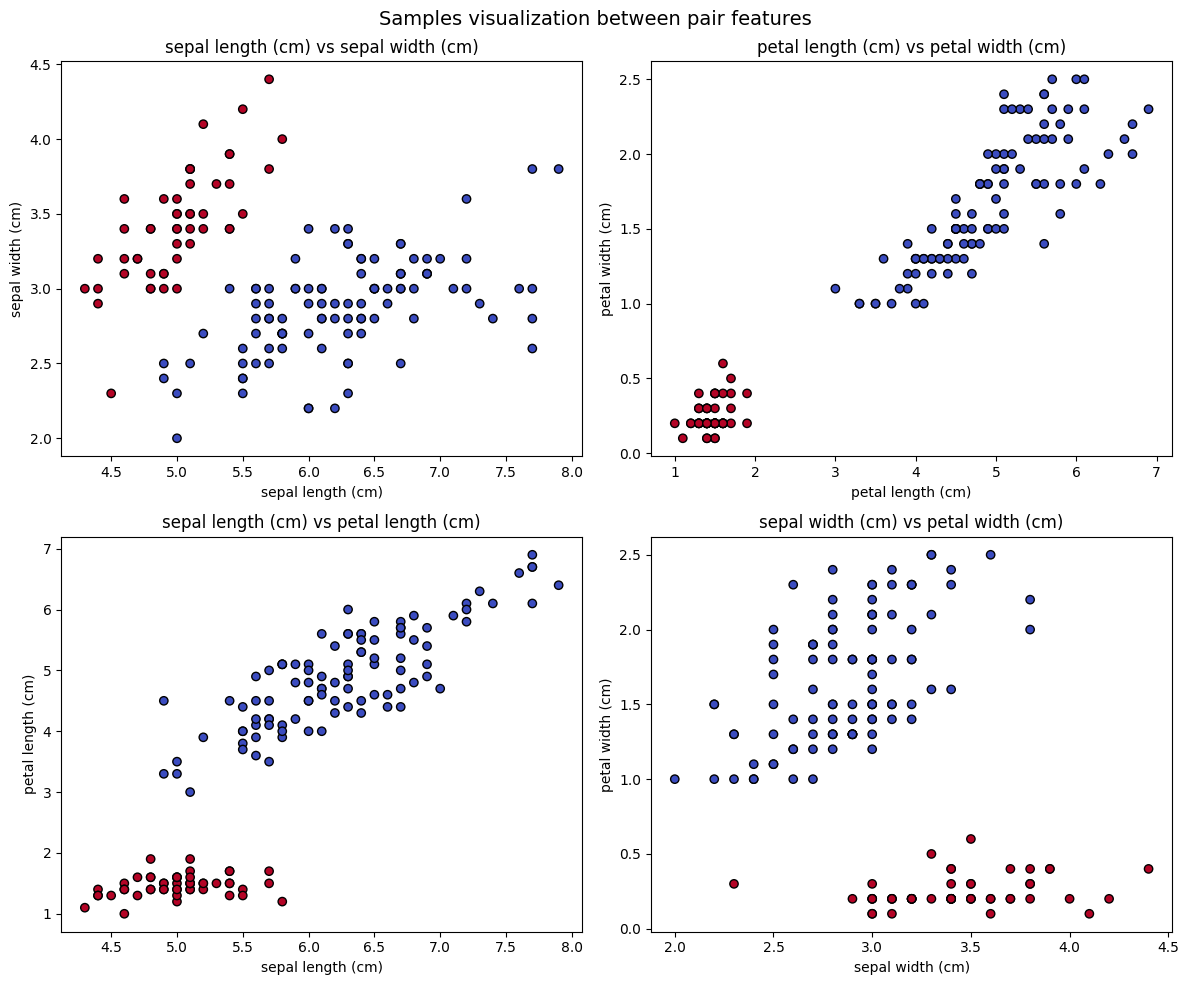

In [161]:
feature_names = iris.feature_names
combinations = [(0, 1), (2, 3), (0, 2), (1, 3)]  # 4 pares de características

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (f1, f2) in enumerate(combinations):
    X_pair = X[:, [f1, f2]]
    ax = axes[i]
    ax.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'{feature_names[f1]} vs {feature_names[f2]}')
    ax.set_xlabel(feature_names[f1])
    ax.set_ylabel(feature_names[f2])

plt.suptitle("Samples visualization between pair features", fontsize=14)
plt.tight_layout()
plt.show()

2. Training: 
- Divide the dataset between train and test set.

In [ ]:
# TO DO 

- Fit a logistic regression. It is similar to the procedure done in the Linear Regression. 

`Hint`: [LogisticRegressionDocumentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# TO DO
model = ...

LogisticRegression()

3. Results Analysis. 

- Predict the test set and compute the metrics:

- $ Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$
- $ Precision = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$
- $ Recall = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $
- $ F1 Score = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

`See more`: [Classification metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html#classification-metrics)





In [ ]:
y_pred = ...

- Generate the Confusion Matrix: 

A confusion matrix is a tool used to evaluate the performance of a classification model. It provides a visual representation of how the model has classified the data, showing the correspondence between the true labels and the predictions made by the model.

It is a table that generally has the following characteristics:

- The rows represent the actual classes (correct labels).

- The columns represent the classes predicted by the model.

It is especially useful in situations where the classes are imbalanced, as it allows identifying potential biases of the model.


In [ ]:
cm = ...
sns.heatmap(cm, annot=True)

- Visualize the model decision

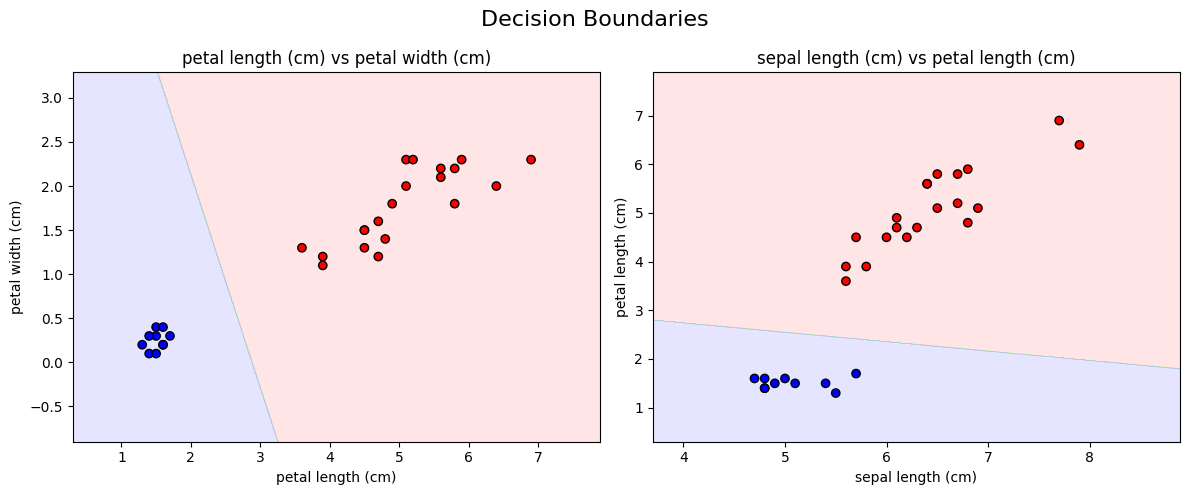

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions_full_model(X, y, model, feature_indices, ax, title, fixed_values=None):
    f1, f2 = feature_indices
    x_min, x_max = X[:, f1].min() - 1, X[:, f1].max() + 1
    y_min, y_max = X[:, f2].min() - 1, X[:, f2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    n_points = xx.ravel().shape[0]
    n_features = X.shape[1]

    X_full = np.zeros((n_points, n_features))
    X_full[:, f1] = xx.ravel()
    X_full[:, f2] = yy.ravel()

    if fixed_values is None:
        fixed_values = np.mean(X, axis=0)
    for i in range(n_features):
        if i != f1 and i != f2:
            X_full[:, i] = fixed_values[i]

    Z = model.predict(X_full)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    scatter = ax.scatter(X[:, f1], X[:, f2], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[f1])
    ax.set_ylabel(feature_names[f2])

# Pairs: (2,3) = Petal length vs Petal width, (0,2) = Sepal length vs Petal length
combinations = [(2, 3), (0, 2)]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fixed_vals = np.mean(X_test, axis=0)

for i, (f1, f2) in enumerate(combinations):
    plot_decision_regions_full_model(X_test, y_test, model, (f1, f2), axes[i],
                                     f"{feature_names[f1]} vs {feature_names[f2]}",
                                     fixed_values=fixed_vals)

plt.suptitle("Decision Boundaries", fontsize=16)
plt.tight_layout()
plt.show()


## Exercise 2

In this exercise, the data will be generated synthetically using the `make_moons` function from the scikit-learn library. This function creates a dataset with a distribution of two types of classes in the shape of two moons, one class in each "half" of the moons.

In [168]:
X, y = make_moons(n_samples=600, noise=0.2, random_state=42)

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("Classes:", np.unique(y))

Number of samples: 600
Number of features: 2
Classes: [0 1]


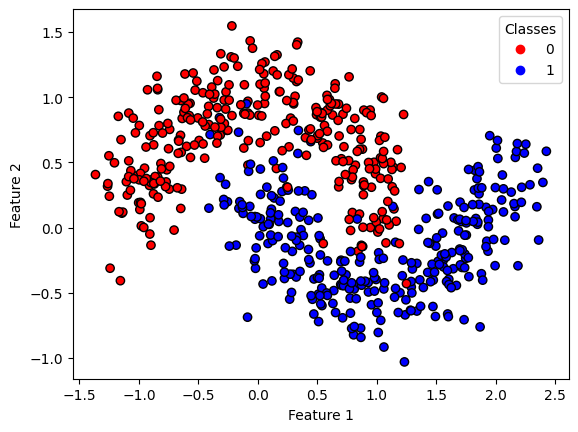

In [169]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

plt.figure()
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



n this exercise, we will delve into the concept of K-fold cross validation and its utility in machine learning model training.

K-Fold Cross Validation is a model evaluation technique that helps obtain a more robust measure of the performance of a classification model, especially when the available dataset is limited. This technique splits the dataset into k subsets or "folds," and uses each subset multiple times to train and validate the model. This way, a more reliable estimate of the model’s ability to generalize to new data can be obtained.

![kfold](../assets/bloc1/kfold.png)

To perform this task, we again use scikit-learn — specifically, the KFold function. This function has the following parameters:

- `n_splits`: Number of splits to make.

- `shuffle`: Boolean indicating whether the data should be shuffled before splitting.

- `random_state`: Random seed.

It returns the different train and test splits, ensuring that the training set and test set sizes follow the specified distribution.

We define a function that wraps this process. 

In [170]:
def cross_validate(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    best_score = -1 
    best_model = None

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_model = model

    return np.mean(scores), scores, best_model

Divide the data as usual:

In [ ]:
# TO DO

- Train a Logistic Regression model using the function `cross_validate` using 5 folds.
- `Hint`: [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
# TO DO 

In [ ]:
print(f"Mean Accuracy (5 folds): {mean_accuracy:.2f}")
print("Accuracy per fold:", fold_accuracies)

Perform a results analysis as we did in Exercise 1.

In [1]:
# TO DO 

In [ ]:
cm = ...
sns.heatmap(cm, annot=True)

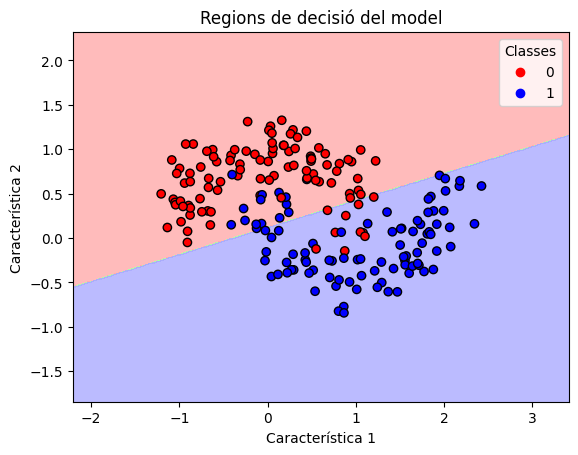

In [176]:
def plot_decision_regions(X, y, model, titol=None):
    """ Atenció: Codi més enllà del nivell de l'assignatura.  

    Args:
        X (np.array): Dades d'entrada.
        y (np.array): Etiquetes.
        model (scikit-learn.model): Model de ML.
        titol (str): Opcional, títol del gràfic.
    
    Returns:
        None
    """
    if titol is None:
        titol = "Regions de decisió del model"
        
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(titol)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

plot_decision_regions(X_test, y_test, model)